# Analytics with Pandas : 1. introduction

## [Download exercises zip](../_static/generated/pandas.zip)

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/pandas)

Python gives powerful tools for data analysis - among the main ones we find [Pandas](https://pandas.pydata.org/), which gives fast and flexible data structures, especially for interactive data analysis.

Pandas reuses existing libraries we've already seen, such as Numpy:

![pydata iuiu34](img/pydata.png)

In this first part of the tutorial we will see:

* filtering and transformation operations on Pandas dataframes
* plotting with MatPlotLib
* Examples with AstroPi dataset
* Exercises with  meteotrentino and other datasets

## 1. What to do

1. unzip exercises in a folder, you should get something like this: 

```
 pandas
     pandas1-intro.ipynb
     pandas1-intro-sol.ipynb     
     pandas2-advanced.ipynb
     pandas2-advanced-sol.ipynb
     pandas3-chal.ipynb
     jupman.py
```

<div class="alert alert-warning">

**WARNING 1**: to correctly visualize the notebook, it MUST be in an unzipped folder !
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then browser. 
3. The browser should show a file list: navigate the list and open the notebook `pandas/pandas1.ipynb`

<div class="alert alert-warning">

**WARNING 2**: DO NOT use the _Upload_ button in Jupyter, instead navigate in Jupyter browser to the unzipped folder !
</div>

4. Go on reading that notebook, and follow instuctions inside.


Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`
- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`
- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`
- If the notebooks look stuck, try to select `Kernel -> Restart`



### Check installation

First let's see if you have already installed pandas on your system, try executing this cell with `Ctrl Enter`:

In [1]:
import pandas as pd


If you saw no error messages, you can skip installation, otherwise do this:

* Anaconda - open Anaconda Prompt and issue this:

`conda install pandas`

* Without Anaconda (`--user` installs in your home):

`python3 -m pip install --user pandas`

### Which pandas should I use?

In this tutorial we adopt version 1 of pandas which is based upon numpy, as at present (2023) it's the most common one and usually the tutorials you find around refer to this version. We should also consider that version 2 was released on April 2023 which is more efficient, can optionally support the [PyArrow](https://levelup.gitconnected.com/welcoming-pandas-2-0-194094e4275b) engine and has better support for 'nullable' types.

## 2. Data analysis of Astro Pi


Let's try analyzing data recorded on a RaspberryPi electronic board installed on the International Space Station (ISS). Data was downloaded from here:

[https://projects.raspberrypi.org/en/projects/astro-pi-flight-data-analysis](https://projects.raspberrypi.org/en/projects/astro-pi-flight-data-analysis)

In the website it's possible to find a detailed description of data gathered by sensors, in the month of February 2016 (one record each 10 seconds).

![ISS uiu9u](img/iss.jpg)

### 2.1 Let's import the file

The method  `read_csv` imports data from a CSV file and saves them in a DataFrame structure.

In this exercise we shall use the file [astropi.csv](astropi.csv) (slightly modified by replacing ROW_ID column with the time_stamp)

In [2]:
import pandas as pd   # we import pandas and for ease we rename it to 'pd'
import numpy as np    # we import numpy and for ease we rename it to 'np'

# remember the encoding !
df = pd.read_csv('astropi.csv', encoding='UTF-8')  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time_stamp  110869 non-null  object 
 1   temp_cpu    110869 non-null  float64
 2   temp_h      110869 non-null  float64
 3   temp_p      110869 non-null  float64
 4   humidity    110869 non-null  float64
 5   pressure    110869 non-null  float64
 6   pitch       110869 non-null  float64
 7   roll        110869 non-null  float64
 8   yaw         110869 non-null  float64
 9   mag_x       110869 non-null  float64
 10  mag_y       110869 non-null  float64
 11  mag_z       110869 non-null  float64
 12  accel_x     110869 non-null  float64
 13  accel_y     110869 non-null  float64
 14  accel_z     110869 non-null  float64
 15  gyro_x      110869 non-null  float64
 16  gyro_y      110869 non-null  float64
 17  gyro_z      110869 non-null  float64
 18  reset       110869 non-null  int64  
dtypes:

### 2.2 Memory

PAndas loads the dataset from hard disk to your computer RAM memory (which in 2023 is typically 8 gigabytes). If by chance your dataset were bigger than available RAM, you would get an error and should start thinking about other tools to perform your analysis. You might also get troubles when making copies of the dataframe. It's then very important to understand how much the dataset actually occupies in RAM. If you look at the bottom, you will see written _memory usage: 16.1 MB_ but **pay attention to that** `+`: Pandas is telling us the dataset occupies in RAM _at least_ 16.1 Mb, but the actual dimension could be greater. 

To see the actual occupied space, try adding the parameter `memory_usage="deep"` to the `df.info` call. The parameter is option because according to the dataset it might take some time to calculate. Do you notice any difference?

- How much space is taken by the original file on your disk? Try to find it by looking in Windows Explorer.

In [3]:
#jupman-purge-output
# write here
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time_stamp  110869 non-null  object 
 1   temp_cpu    110869 non-null  float64
 2   temp_h      110869 non-null  float64
 3   temp_p      110869 non-null  float64
 4   humidity    110869 non-null  float64
 5   pressure    110869 non-null  float64
 6   pitch       110869 non-null  float64
 7   roll        110869 non-null  float64
 8   yaw         110869 non-null  float64
 9   mag_x       110869 non-null  float64
 10  mag_y       110869 non-null  float64
 11  mag_z       110869 non-null  float64
 12  accel_x     110869 non-null  float64
 13  accel_y     110869 non-null  float64
 14  accel_z     110869 non-null  float64
 15  gyro_x      110869 non-null  float64
 16  gyro_y      110869 non-null  float64
 17  gyro_z      110869 non-null  float64
 18  reset       110869 non-null  int64  
dtypes:

### 2.3 Dimensions

We can quickly see rows and columns of the dataframe with the attribute `shape`:

**NOTE**: `shape` is **not** followed by round parenthesis !

In [4]:
df.shape

(110869, 19)

### 2.4 Let's explore!

In [5]:
df

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110864,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0
110865,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0
110866,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0
110867,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0


Note the first bold numerical column is an integer index that was automatically assigned by Pandas when the dataset got loaded. Note also it starts from zero. If we wanted, we could set a different index but we won't do it in this tutorial.

`head()` method gives back the first datasets:

In [6]:
df.head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0


`tail()` method gives back last rows:

In [7]:
df.tail()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
110864,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0
110865,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0
110866,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0
110867,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0
110868,2016-02-29 09:25:00,31.57,27.51,24.83,42.94,1005.86,2.17,49.77,134.18,-17.885872,-27.824149,1.293345,-0.000787,0.017261,0.014380,0.000459,0.000076,0.000030,0


### 2.5 Some stats

The `describe` method gives you much summary info on the fly:

* rows counting
* the average
* [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation)
* [quantiles](https://en.wikipedia.org/wiki/Quantile)
* minimum and maximum

In [8]:
df.describe()

,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
count,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.00000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,1.108690e+05,110869.000000,1.108690e+05,110869.000000
mean,32.236259,28.101773,25.543272,46.252005,1008.126788,2.770553,51.807973,200.90126,-19.465265,-1.174493,-6.004529,-0.000630,0.018504,0.014512,-8.959493e-07,0.000007,-9.671594e-07,0.000180
std,0.360289,0.369256,0.380877,1.907273,3.093485,21.848940,2.085821,84.47763,28.120202,15.655121,8.552481,0.000224,0.000604,0.000312,2.807614e-03,0.002456,2.133104e-03,0.060065
min,31.410000,27.200000,24.530000,42.270000,1001.560000,0.000000,30.890000,0.01000,-73.046240,-43.810030,-41.163040,-0.025034,-0.005903,-0.022900,-3.037930e-01,-0.378412,-2.970800e-01,0.000000
25%,31.960000,27.840000,25.260000,45.230000,1006.090000,1.140000,51.180000,162.43000,-41.742792,-12.982321,-11.238430,-0.000697,0.018009,0.014349,-2.750000e-04,-0.000278,-1.200000e-04,0.000000
50%,32.280000,28.110000,25.570000,46.130000,1007.650000,1.450000,51.950000,190.58000,-21.339485,-1.350467,-5.764400,-0.000631,0.018620,0.014510,-3.000000e-06,-0.000004,-1.000000e-06,0.000000
75%,32.480000,28.360000,25.790000,46.880000,1010.270000,1.740000,52.450000,256.34000,7.299000,11.912456,-0.653705,-0.000567,0.018940,0.014673,2.710000e-04,0.000271,1.190000e-04,0.000000
max,33.700000,29.280000,26.810000,60.590000,1021.780000,360.000000,359.400000,359.98000,33.134748,37.552135,31.003047,0.018708,0.041012,0.029938,2.151470e-01,0.389499,2.698760e-01,20.000000


**QUESTION**: is there some missing field from the table produced by describe? Why is it not included? 

With `corr` method we can see the correlation between  DataFrame columns.

In [9]:
df.corr()

,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
temp_cpu,1.000000,0.986872,0.991672,-0.297081,0.038065,0.008076,-0.171644,-0.117972,0.005145,-0.285192,-0.120838,-0.023582,-0.446358,-0.029155,0.002511,0.005947,-0.001250,-0.002970
temp_h,0.986872,1.000000,0.993260,-0.281422,0.070882,0.005145,-0.199628,-0.117870,0.000428,-0.276276,-0.098864,-0.032188,-0.510126,-0.043213,0.001771,0.005020,-0.001423,-0.004325
temp_p,0.991672,0.993260,1.000000,-0.288373,0.035496,0.006750,-0.163685,-0.118463,0.004338,-0.283427,-0.114407,-0.018047,-0.428884,-0.036505,0.001829,0.006127,-0.001623,-0.004205
humidity,-0.297081,-0.281422,-0.288373,1.000000,0.434374,0.004050,0.101304,0.031664,-0.035146,0.077897,0.076424,-0.009741,0.226281,0.005281,0.004345,0.003457,0.001298,-0.002066
pressure,0.038065,0.070882,0.035496,0.434374,1.000000,0.003018,0.011815,-0.051697,-0.040183,-0.074578,0.092352,0.013556,-0.115642,-0.221208,-0.000611,-0.002493,-0.000615,-0.006259
pitch,0.008076,0.005145,0.006750,0.004050,0.003018,1.000000,0.087941,-0.011611,0.013331,0.006133,0.000540,0.043285,0.009015,-0.039146,0.066618,-0.015034,0.049340,-0.000176
roll,-0.171644,-0.199628,-0.163685,0.101304,0.011815,0.087941,1.000000,0.095354,-0.020947,0.060297,-0.080620,0.116637,0.462630,-0.167905,-0.115873,-0.002509,-0.214202,0.000636
yaw,-0.117972,-0.117870,-0.118463,0.031664,-0.051697,-0.011611,0.095354,1.000000,0.257971,0.549394,-0.328360,0.006943,0.044157,-0.013634,0.003106,0.003665,0.004020,-0.000558
mag_x,0.005145,0.000428,0.004338,-0.035146,-0.040183,0.013331,-0.020947,0.257971,1.000000,0.001239,-0.213070,-0.006629,0.027921,0.021524,-0.004954,-0.004429,-0.005052,-0.002879
mag_y,-0.285192,-0.276276,-0.283427,0.077897,-0.074578,0.006133,0.060297,0.549394,0.001239,1.000000,-0.266351,0.014057,0.051619,-0.053016,0.001239,0.001063,0.001530,-0.001335


### 2.6 Guardiamo le colonne

`colums` property gives the column headers:

In [10]:
df.columns

Index(['time_stamp', 'temp_cpu', 'temp_h', 'temp_p', 'humidity', 'pressure',
       'pitch', 'roll', 'yaw', 'mag_x', 'mag_y', 'mag_z', 'accel_x', 'accel_y',
       'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'reset'],
      dtype='object')

As you see in the above, the type of the found object  is not a list, but a special container defined by pandas:

In [11]:
type(df.columns)

pandas.core.indexes.base.Index

Nevertheless, we can access the elements of this container using indeces within the squared parenthesis:

In [12]:
df.columns[0]

'time_stamp'

In [13]:
df.columns[1]

'temp_cpu'

### 2.7 What is a column?

We can access a column like this:

In [14]:
df['humidity']

0         44.94
1         45.12
2         45.12
3         45.32
4         45.18
          ...  
110864    42.94
110865    42.72
110866    42.83
110867    42.81
110868    42.94
Name: humidity, Length: 110869, dtype: float64

Even handier, we can use the dot notation:

In [15]:
df.humidity

0         44.94
1         45.12
2         45.12
3         45.32
4         45.18
          ...  
110864    42.94
110865    42.72
110866    42.83
110867    42.81
110868    42.94
Name: humidity, Length: 110869, dtype: float64

<div class="alert alert-warning">

**WARNING**: they look like two columns, but it's actually only one!
</div>

The sequence of numbers on the left is the integer index that Pandas automatically assigned to the dataset when it was created (notice it starts from zero).

<div class="alert alert-warning">

**WARNING: Careful about spaces!**:

In case the field name has spaces (es. `'blender rotations'`), **do not** use the dot notation, instead use squared bracket notation seen above (ie: `df.['blender rotations']`)
</div>

The type of a column is `Series`:

In [16]:
type(df.humidity)

pandas.core.series.Series

Some operations also work on single columns, i.e. `.describe()`:

In [17]:
df.humidity.describe()

count    110869.000000
mean         46.252005
std           1.907273
min          42.270000
25%          45.230000
50%          46.130000
75%          46.880000
max          60.590000
Name: humidity, dtype: float64

### 2.8 Exercise - meteo info 

✪ a) Create a new dataframe called  `meteo` by importing the data from file [meteo.csv](meteo.csv), which contains the meteo data of Trento from November 2017 (source: [www.meteotrentino.it](https://www.meteotrentino.it)). **IMPORTANT**: assign the dataframe to a variable called  `meteo` (so we avoid confusion whith AstroPi dataframe)


b) Visualize info about this dataframe

In [18]:
# write here - create dataframe

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
print("COLUMNS:", ', '.join(meteo.columns))
print()
print(meteo.columns)
print()
print("INFO:")
print(meteo.info())
print()
print("FIRST ROWS:")

print(meteo.head())

COLUMNS: Date, Pressure, Rain, Temp

Index(['Date', 'Pressure', 'Rain', 'Temp'], dtype='object')

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2878 non-null   object 
 1   Pressure  2878 non-null   float64
 2   Rain      2878 non-null   float64
 3   Temp      2878 non-null   float64
dtypes: float64(3), object(1)
memory usage: 90.1+ KB
None

FIRST ROWS:
               Date  Pressure  Rain  Temp
0  01/11/2017 00:00     995.4   0.0   5.4
1  01/11/2017 00:15     995.5   0.0   6.0
2  01/11/2017 00:30     995.5   0.0   5.9
3  01/11/2017 00:45     995.7   0.0   5.4
4  01/11/2017 01:00     995.7   0.0   5.3


## 3. MatPlotLib review

We've already seen MatplotLib in the part on [visualization](https://en.softpython.org/visualization/visualization1-sol.html), and today we use  [Matplotlib](http://matplotlib.org) to display data.

### 3.1 An example

Let's take again an example, with the  _Matlab approach_. We will plot a line passing two lists of coordinates, one for xs and one for ys:

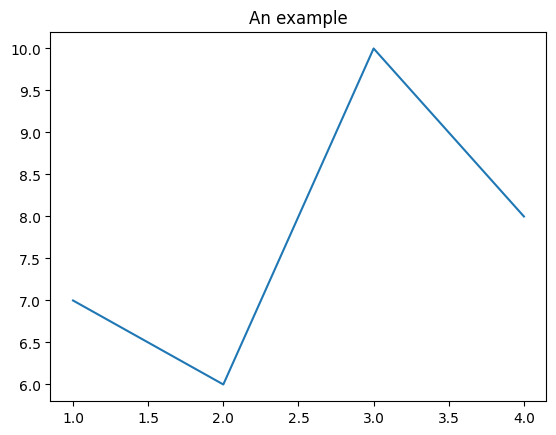

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

xs = [ 1, 2, 3, 4]
ys =  [ 7, 6,10, 8]
plt.plot(xs, ys) # we can directly pass xs and ys lists
plt.title('An example')
plt.show()


We can also create the series with numpy. Let's try a parabola:

In [20]:
import numpy as np
xs = np.arange(0.,5.,0.1)
#  '**' is the power operator in  Python, NOT '^'
ys = xs**2  

Let's use the  `type` function to understand which data types are  xs and ys:

In [21]:
type(xs)

numpy.ndarray

In [22]:
type(ys)

numpy.ndarray

Hence we have  NumPy arrays.

Let's plot it:

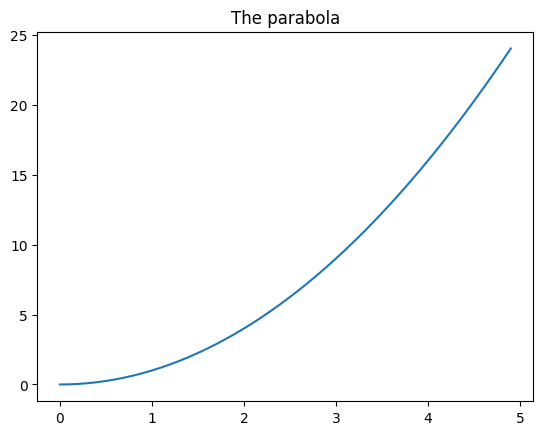

In [23]:
plt.title('The parabola')
plt.plot(xs,ys);

If we want the same units in both x and y axis, we can use the [gca](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html?highlight=matplotlib%20pyplot%20gca#matplotlib.pyplot.gca) function

To set x and y limits, we can use `xlim` e `ylim`:

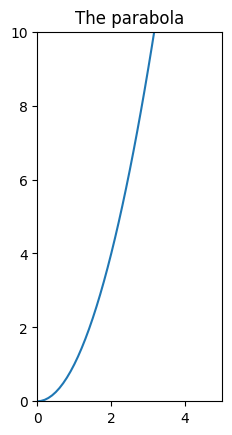

In [24]:
plt.xlim([0, 5])
plt.ylim([0,10])
plt.title('The parabola')

plt.gca().set_aspect('equal')
plt.plot(xs,ys);

### 3.2 Matplotlib plots from pandas datastructures 

We can get plots directly from pandas data structures using the  _matlab style_. Let's make a simple example, for more complex cases we refer to [DataFrame.plot documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html). 

In case of big quantity of data, it may be useful to have a qualitative idea of data by putting them in a plot:

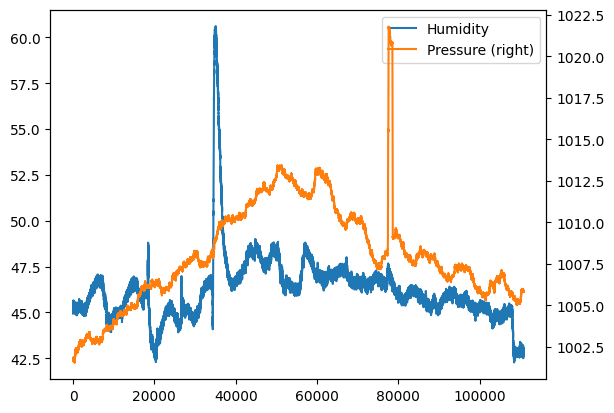

In [25]:
df.humidity.plot(label="Humidity", legend=True)
# with secondary_y=True we display number on y axis
# of graph on the right
df.pressure.plot(secondary_y=True, label="Pressure", legend=True);

If we want, we can always directly use the original function `plt.plot`, it's sufficient to pass a sequence for the x coordinates and another one for the ys. For example, if we wanted to replicate the above example for humidity, for the x coordinates we could extract the dataframe index  which is an iterable:

In [26]:
df.index

RangeIndex(start=0, stop=110869, step=1)

and then pass it to `plt.plot` as first parameter. As second parameter, we can directly pass the humidity Series: since it's also an iterable, Python will automatically be able to get the cells values:

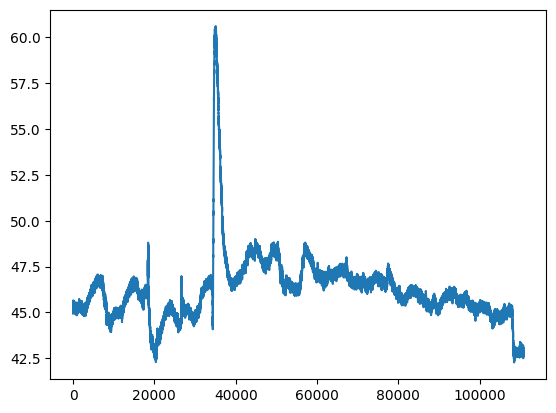

In [27]:
plt.plot(df.index, df['humidity'])
plt.show() # prevents visualization of weird characters

## 4. Operations on rows

If we consider the rows of a dataset, typically we will want to index, filter and order them.

### 4.1 Indexing integers

We report here the simplest indexing with row numbers.

To obtain the  i-th series you can use the method `iloc[i]` (here we reuse AstroPi dataset) :

In [28]:
df.iloc[6]

time_stamp    2016-02-16 10:45:41
temp_cpu                    31.68
temp_h                      27.53
temp_p                      25.01
humidity                    45.31
pressure                   1001.7
pitch                        0.63
roll                        53.55
yaw                         186.1
mag_x                  -50.447346
mag_y                   -7.937309
mag_z                  -12.188574
accel_x                  -0.00051
accel_y                  0.019264
accel_z                  0.014528
gyro_x                  -0.000111
gyro_y                    0.00032
gyro_z                   0.000222
reset                           0
Name: 6, dtype: object

It's possible to select a dataframe of contiguous positions by using _slicing_, as we already did for [strings](https://en.softpython.org/strings/strings2-sol.html#Slices) and [lists](https://en.softpython.org/lists/lists2-sol.html#Slices)

For example, here we select the rows from 5th _included_ to 7-th _excluded_ :

In [29]:
df.iloc[5:7]

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
5,2016-02-16 10:45:30,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0
6,2016-02-16 10:45:41,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,-7.937309,-12.188574,-0.000510,0.019264,0.014528,-0.000111,0.000320,0.000222,0


By filtering the rows we can 'zoom in' the dataset, selecting for example  the rows between the 12500th (included) and the  15000th (excluded) in the new dataframe  `df2`: 

In [30]:
df2=df.iloc[12500:15000]

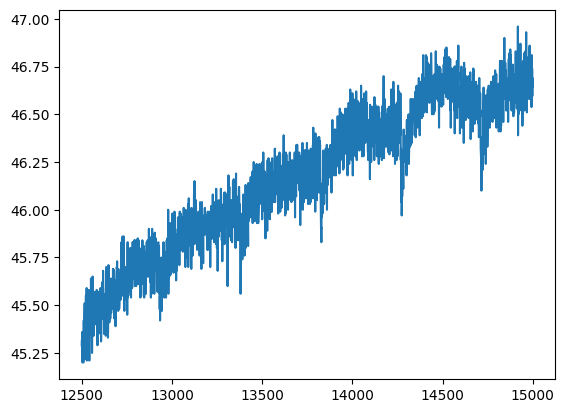

In [31]:
plt.plot(df2.index, df2['humidity'])

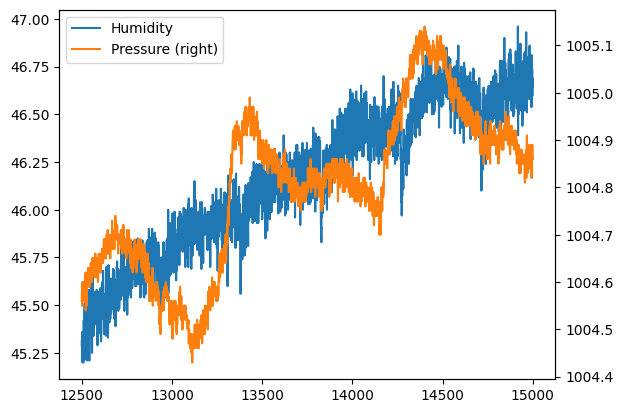

In [32]:
df2.humidity.plot(label="Humidity", legend=True)
df2.pressure.plot(secondary_y=True, label="Pressure", legend=True)
plt.show() # prevents visualization of weird characters

### Difference between `iloc` and `loc`

`iloc` always uses an integer and returns always the row in the natural order of the dataframe we are inspecting.

`loc` on the other hand searches in the _index assigned by pandas_, which is the one you can see in bold when we show the dataset.

Apparently they look similar but the difference between them becomes evident whenever we act on filtered dataframes. Let's check the first rows of the filtered dataframe `df2`:

In [33]:
df2.head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
12500,2016-02-17 21:44:31,31.87,27.7,25.15,45.29,1004.56,0.85,52.78,357.18,30.517177,2.892431,0.371669,-0.000618,0.019318,0.014503,-0.000135,-0.000257,0.000121,0
12501,2016-02-17 21:44:40,31.84,27.7,25.16,45.32,1004.58,0.97,52.73,357.32,30.364154,2.315241,0.043272,-0.001196,0.019164,0.014545,0.000254,0.000497,-0.000010,0
12502,2016-02-17 21:44:51,31.83,27.7,25.15,45.23,1004.55,1.40,52.84,357.76,29.760987,1.904932,0.037701,-0.000617,0.019420,0.014672,0.000192,0.000081,0.000024,0
12503,2016-02-17 21:45:00,31.83,27.7,25.15,45.36,1004.58,2.14,52.84,357.79,29.882673,1.624020,-0.249268,-0.000723,0.019359,0.014691,0.000597,0.000453,-0.000118,0
12504,2016-02-17 21:45:10,31.83,27.7,25.15,45.20,1004.60,1.76,52.98,357.78,29.641547,1.532007,-0.336724,-0.000664,0.019245,0.014673,0.000373,0.000470,-0.000130,0


Let's consider number `0`, in this case:

- `.iloc[0]` selects the initial row
- `.loc[0]` selects the row at _pandas index_ with value zero

**QUESTION**: in case of `df2`, what's the initial row? What's its _pandas index_?

**ANSWER**: la riga iniziale ha _indice di pandas_ `12500`

Let's see the difference in results. 

`df2.loc[0]` will actually find the zeroth row:

In [34]:
df2.iloc[0]

time_stamp    2016-02-17 21:44:31
temp_cpu                    31.87
temp_h                       27.7
temp_p                      25.15
humidity                    45.29
pressure                  1004.56
pitch                        0.85
roll                        52.78
yaw                        357.18
mag_x                   30.517177
mag_y                    2.892431
mag_z                    0.371669
accel_x                 -0.000618
accel_y                  0.019318
accel_z                  0.014503
gyro_x                  -0.000135
gyro_y                  -0.000257
gyro_z                   0.000121
reset                           0
Name: 12500, dtype: object

df2.loc[0] instead will miserably fail:

```python
df2.loc[0]
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
~/.local/lib/python3.7/site-packages/pandas/core/indexes/range.py in get_loc(self, key, method, tolerance)
    384                 try:
--> 385                     return self._range.index(new_key)
    386                 except ValueError as err:

ValueError: 0 is not in range
```

Let's try using the _pandas index_ for the zeroth row:

In [35]:
df2.loc[12500]

time_stamp    2016-02-17 21:44:31
temp_cpu                    31.87
temp_h                       27.7
temp_p                      25.15
humidity                    45.29
pressure                  1004.56
pitch                        0.85
roll                        52.78
yaw                        357.18
mag_x                   30.517177
mag_y                    2.892431
mag_z                    0.371669
accel_x                 -0.000618
accel_y                  0.019318
accel_z                  0.014503
gyro_x                  -0.000135
gyro_y                  -0.000257
gyro_z                   0.000121
reset                           0
Name: 12500, dtype: object

As expected, this was correctly found.

### 4.2 Filtering

It's possible to filter data by according to a condition data should satisfy, which can be expressed by indicating a column and a comparison operator. For example:

In [36]:
df.humidity < 45.2

0          True
1          True
2          True
3         False
4          True
          ...  
110864     True
110865     True
110866     True
110867     True
110868     True
Name: humidity, Length: 110869, dtype: bool

We see it's a series of values `True` or `False`, according to `df.humidity` being less than `45.2`. What's the type of this result?

In [37]:
type(df.humidity < 45.2)

pandas.core.series.Series

#### Combining filters

It's possible to combine conditions like we already did in [Numpy filtering](https://en.softpython.org/matrices-numpy/matrices-numpy1-sol.html#Filtering): for example by using the special operator conjunction `&` 

If we write `(df.humidity > 45.0) & (df.humidity < 45.2)` we obtain a series of values `True` or `False`, whether `df.humidity` is at the same time greater or equal than `45.0` and less or equal of `45.2`

In [38]:
type((df.humidity > 45.0) & (df.humidity < 45.2))

pandas.core.series.Series

#### Applying a filter

If we want complete rows of the dataframe which satisfy the condition, we can write like this:

<div class="alert alert-warning">

**IMPORTANT**:  we use `df` externally from expression `df[     ]` starting and closing the  square bracket parenthesis to tell Python we want to filter the `df` dataframe, and use again `df` _inside_ the parenthesis to tell on _which_ columns and _which_ rows we want to filter

</div>

In [39]:
df[  (df.humidity > 45.0) & (df.humidity < 45.2) ]

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0
5,2016-02-16 10:45:30,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0
10,2016-02-16 10:46:20,31.68,27.53,25.00,45.16,1001.72,1.32,53.52,186.24,-51.616473,-6.818130,-11.860839,-0.000530,0.019477,0.014500,0.000268,0.001194,0.000106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108001,2016-02-29 01:23:30,32.32,28.20,25.57,45.05,1005.74,1.32,50.04,338.15,15.549799,-1.424077,-9.087291,-0.000754,0.017375,0.014826,0.000908,0.000447,0.000149,0
108003,2016-02-29 01:23:50,32.28,28.18,25.57,45.10,1005.76,1.65,50.03,338.91,15.134025,-1.776843,-8.806690,-0.000819,0.017378,0.014974,0.000048,-0.000084,-0.000039,0
108004,2016-02-29 01:24:00,32.30,28.18,25.57,45.11,1005.74,1.70,50.21,338.19,14.799790,-1.695364,-8.895130,-0.000739,0.017478,0.014792,-0.000311,-0.000417,-0.000008,0
108006,2016-02-29 01:24:20,32.29,28.19,25.57,45.02,1005.73,0.81,49.81,339.24,14.333920,-2.173228,-8.694976,-0.000606,0.017275,0.014725,-0.000589,-0.000443,-0.000032,0


**Another example**: if we want to search the record(s) where pressure is maximal, we use `values` property of the series on which we calculate the maximal value:

In [40]:
df[  df.humidity == df.humidity.values.max()  ]

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
35068,2016-02-20 12:57:40,31.58,27.41,24.83,60.59,1008.91,1.86,51.78,192.83,-53.325819,10.641053,-6.898934,-0.000657,0.018981,0.014993,0.000608,0.000234,-0.000063,0
35137,2016-02-20 13:09:20,31.60,27.50,24.89,60.59,1008.97,1.78,51.91,208.49,-29.012379,14.546882,-8.387606,-0.000811,0.019145,0.015148,0.000038,-0.000182,0.000066,0


**QUESTION**: if you remember, when talking about the basics of floats, [we said](https://en.softpython.org/basics/basics3-floats-sol.html#Reals---equality) that comparing floats with equality is a actually a bad thing. Do you remember why? Does it really matters in this case?

**ANSWER**: when dealing with `float` numbers, two mathematically sound computations that in theory should produce the same result can unfortunately produce slightly different numbers (es. `0.1 + 0.2 == 0.7 - 0.4` will give you... `False`). But in this case we can almost safely assume pandas is just comparing raw data without performing other potentially problematic computations.

### 4.3 Sorting

To obtain a NEW dataframe sorted according to one or more columns, we can use the   `sort_values` method: 

In [41]:
df.sort_values('pressure',ascending=False).head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
77602,2016-02-25 12:13:20,32.44,28.31,25.74,47.57,1021.78,1.10,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.018170,0.014295,-0.000139,-0.000179,-0.000298,0
77601,2016-02-25 12:13:10,32.45,28.30,25.74,47.26,1021.75,1.53,51.76,266.12,-1.266335,10.927442,-15.690558,-0.000661,0.018357,0.014533,0.000152,0.000459,-0.000298,0
77603,2016-02-25 12:13:30,32.44,28.30,25.74,47.29,1021.75,1.86,51.83,268.83,-0.320795,10.651441,-15.565123,-0.000648,0.018290,0.014372,0.000049,0.000473,-0.000029,0
77604,2016-02-25 12:13:40,32.43,28.30,25.74,47.39,1021.75,1.78,51.54,269.41,-0.130574,10.628383,-15.488983,-0.000672,0.018154,0.014602,0.000360,0.000089,-0.000002,0
77608,2016-02-25 12:14:20,32.42,28.29,25.74,47.36,1021.73,0.86,51.89,272.77,0.952025,10.435951,-16.027235,-0.000607,0.018186,0.014232,-0.000260,-0.000059,-0.000187,0


### 4.4  Exercise - Meteo stats

✪ Analyze data from  Dataframe ```meteo``` to find:

* values of average pression, minimal and maximal
* average temperature
* the dates of rainy days

In [42]:
# write here
print("Average pressure : %s" % meteo.Pressure.values.mean())
print("Minimal pressure : %s" % meteo.Pressure.values.min())
print("Maximal pressure : %s" % meteo.Pressure.values.max())
print("Average temperature : %s" % meteo.Temp.values.mean())
meteo[(meteo.Rain > 0)]

Average pressure : 986.3408269631689
Minimal pressure : 966.3
Maximal pressure : 998.3
Average temperature : 6.410701876302988


,Date,Pressure,Rain,Temp
433,05/11/2017 12:15,979.2,0.2,8.6
435,05/11/2017 12:45,978.9,0.2,8.4
436,05/11/2017 13:00,979.0,0.2,8.4
437,05/11/2017 13:15,979.1,0.8,8.2
438,05/11/2017 13:30,979.0,0.6,8.2
...,...,...,...,...
2754,29/11/2017 17:15,976.1,0.2,0.9
2755,29/11/2017 17:30,975.9,0.2,0.9
2802,30/11/2017 05:15,971.3,0.2,1.3
2803,30/11/2017 05:30,971.3,0.2,1.1


### 4.5 Exercise - meteo plot

✪ Put in a plot the temperature from  dataframe _meteo:_


In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# write here



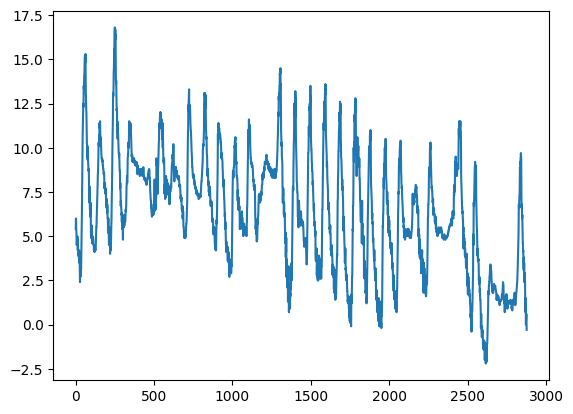

In [44]:
# SOLUTION
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

meteo.Temp.plot()
plt.show()


### 4.6 Exercise - Meteo pressure and raining

✪ In the same plot as above show the pressure and amount of raining.



In [45]:
# write here


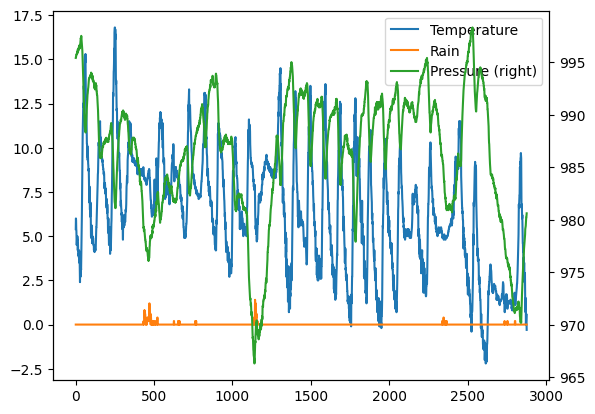

In [46]:
# SOLUTION

meteo.Temp.plot(label="Temperature", legend=True)
meteo.Rain.plot(label="Rain", legend=True)
meteo.Pressure.plot(secondary_y=True, label="Pressure", legend=True);
plt.show()

## 5. Object values and strings

In general, when we want to manipulate objects of a known type, say strings which have type `str`,  we can write `.str` after a series and then treat the result like it were  a single string, using any operator (es: slicing) or method that particular class allows us, plus others provided by pandas

Text in particular can be manipulated in many ways, for more details [see pandas documentation](https://pandas.pydata.org/pandas-docs/stable/text.html))


### 5.1 Filter by textual values

When we want to filter by text values, we can use `.str.contains`, here for example we select all the samples in the last days of february (which have timestamp containing `2016-02-2`) : 

In [47]:
df[  df['time_stamp'].str.contains('2016-02-2')  ]

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
30442,2016-02-20 00:00:00,32.30,28.12,25.59,45.05,1008.01,1.47,51.82,51.18,9.215883,-12.947023,4.066202,-0.000612,0.018792,0.014558,-0.000042,0.000275,0.000157,0
30443,2016-02-20 00:00:10,32.25,28.13,25.59,44.82,1008.02,0.81,51.53,52.21,8.710130,-13.143595,3.499386,-0.000718,0.019290,0.014667,0.000260,0.001011,0.000149,0
30444,2016-02-20 00:00:41,33.07,28.13,25.59,45.08,1008.09,0.68,51.69,57.36,7.383435,-13.827667,4.438656,-0.000700,0.018714,0.014598,0.000299,0.000343,-0.000025,0
30445,2016-02-20 00:00:50,32.63,28.10,25.60,44.87,1008.07,1.42,52.13,59.95,7.292313,-13.999682,4.517029,-0.000657,0.018857,0.014565,0.000160,0.000349,-0.000190,0
30446,2016-02-20 00:01:01,32.55,28.11,25.60,44.94,1008.07,1.41,51.86,61.83,6.699141,-14.065591,4.448778,-0.000678,0.018871,0.014564,-0.000608,-0.000381,-0.000243,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110864,2016-02-29 09:24:21,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0
110865,2016-02-29 09:24:30,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0
110866,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0
110867,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0


<div class="alert alert-warning">
    
**WARNING: DON'T use operator** `in`:     
    
You may be tempted to use it for filtering but you will soon discover it doesn't work. The reason is it produces _only one_ value but when filtering we want a series of booleans with $n$ values, one per row.
</div>    

In [48]:
# Try check what happens when using it:


In [49]:
#jupman-purge-io
#df[  '2016-02-2' in df['time_stamp']  ]   # KeyError 

### 5.2 Extracting strings

To extract only the day from `timestamp` column, we can use `str` and slice operator with square brackets:

In [50]:
df['time_stamp'].str[8:10]  

0         16
1         16
2         16
3         16
4         16
          ..
110864    29
110865    29
110866    29
110867    29
110868    29
Name: time_stamp, Length: 110869, dtype: object

## 6. Operations on columns

Let's see now how to select, add and trasform columns.

### 6.1 - Selecting columns

If we want a subset of columns, we can express the names in a list like this:

**NOTE**: inside the external square brackets ther is a simple list without `df`!



In [51]:
df[  ['temp_h', 'temp_p', 'time_stamp']  ]

,temp_h,temp_p,time_stamp
0,27.57,25.01,2016-02-16 10:44:40
1,27.53,25.01,2016-02-16 10:44:50
2,27.53,25.01,2016-02-16 10:45:00
3,27.52,25.01,2016-02-16 10:45:10
4,27.54,25.01,2016-02-16 10:45:20
...,...,...,...
110864,27.52,24.83,2016-02-29 09:24:21
110865,27.50,24.83,2016-02-29 09:24:30
110866,27.50,24.83,2016-02-29 09:24:41
110867,27.50,24.83,2016-02-29 09:24:50


As always selecting the columns doens't change the original dataframe:

In [52]:
df.head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0



### 6.2 - Adding columns

It's possible to obtain new columns by calculating them from other columns in a very natural way. For example, we get new column  `mag_tot`, that is the absolute magnetic field taken from space station by  `mag_x`, `mag_y`, e `mag_z`, and then plot it:

In [53]:
df['mag_tot'] = df['mag_x']**2 + df['mag_y']**2 + df['mag_z']**2

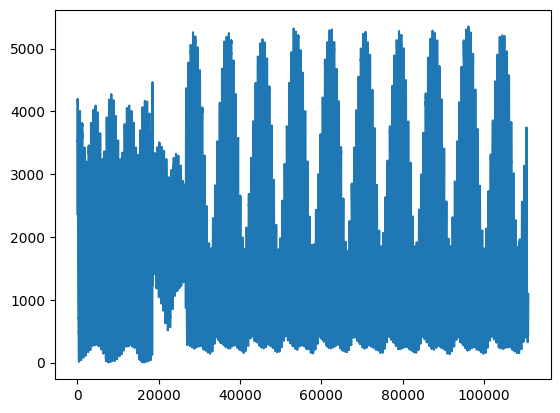

In [54]:
df.mag_tot.plot()
plt.show()

Let's find when the  magnetic field was maximal: 

In [55]:
df['time_stamp'][(df.mag_tot == df.mag_tot.values.max())]

96156    2016-02-27 16:12:31
Name: time_stamp, dtype: object

Try filling in the value found on the website [isstracker.com/historical](http://www.isstracker.com/historical), you should find the positions where the magnetic field is at the highest.

### 6.2.1 Exercise: Meteo temperature in Fahrenheit 

In `meteo` dataframe, create a column `Temp (Fahrenheit)` with the temperature measured in Fahrenheit degrees.

Formula to calculate conversion from Celsius degrees (C):


$Fahrenheit = \frac{9}{5}C + 32$

In [56]:
# write here



In [57]:
# SOLUTION
print()
print("       **************  SOLUTION OUTPUT  **************")
meteo['Temp (Fahrenheit)'] = meteo['Temp']* 9/5 + 32 
meteo.head()


       **************  SOLUTION OUTPUT  **************


,Date,Pressure,Rain,Temp,Temp (Fahrenheit)
0,01/11/2017 00:00,995.4,0.0,5.4,41.72
1,01/11/2017 00:15,995.5,0.0,6.0,42.80
2,01/11/2017 00:30,995.5,0.0,5.9,42.62
3,01/11/2017 00:45,995.7,0.0,5.4,41.72
4,01/11/2017 01:00,995.7,0.0,5.3,41.54


### 6.2.2 Exercise - Pressure vs Temperature

Pressure should be directly proportional to temperature in a closed environment [Gay-Lussac's law](https://en.wikipedia.org/wiki/Gay-Lussac%27s_law):

$\frac{P}{T} = k$

Does this holds true for `meteo` dataset? Try to find out by direct calculation of the formula and compare with `corr()` method results.

In [58]:
# SOLUTION
#jupman-purge-output

# as expected, in an open environment there is not much linear correlation
print(meteo.corr())
meteo['Pressure'] / meteo['Temp']

                   Pressure      Rain      Temp  Temp (Fahrenheit)
Pressure           1.000000 -0.270345 -0.214149          -0.214149
Rain              -0.270345  1.000000  0.025227           0.025227
Temp              -0.214149  0.025227  1.000000           1.000000
Temp (Fahrenheit) -0.214149  0.025227  1.000000           1.000000


0        184.333333
1        165.916667
2        168.728814
3        184.388889
4        187.867925
           ...     
2873    4900.000000
2874    1960.400000
2875    1633.666667
2876    4902.500000
2877   -3268.666667
Length: 2878, dtype: float64

### 6.3 Scrivere in colonne filtrate con `loc`

The  `loc` property allows to filter rows according to a property and select a column, which can be new. In this case, for rows where cpu temperature is too high, we write `True` value in the fields of the column with header`'cpu_too_hot'`:

In [59]:
df.loc[(df.temp_cpu > 31.68),'cpu_too_hot'] = True 

Let's see the resulting table  (scroll until the end to see the new column). We note the values from the rows we did not filter are represented with [NaN](https://en.softpython.org/matrices-numpy/matrices-numpy-sol.html#NaNs-and-infinities), which literally means  _not a number_ : 

In [60]:
df.head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,mag_tot,cpu_too_hot
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2368.337207,True
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2615.870247,True
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2648.484927,NaN
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2665.305485,True
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2732.388620,NaN


Pandas is a very flexible library, and gives several methods to obtain the same results. 

For example, if we want to write in a column some values where rows satisfy a given criteria, and other values when the condition isn't satisfied, we can use a single command `np.where`

Proviamo ad aggiungere una colonna `controllo_pressione` che mi dice se la pressione is `below` or `above` the average (scroll till the end to see it):

In [61]:
avg_pressure = df.pressure.values.mean()

In [62]:
df['check_p'] = np.where(df.pressure <= avg_pressure, 'below', 'over')

Let's select some rows where we know the variation is evident:

In [63]:
df.iloc[29735:29745]  

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,mag_tot,cpu_too_hot,check_p
29735,2016-02-19 22:00:51,32.24,28.03,25.52,44.55,1008.11,1.83,52.10,272.50,0.666420,...,-0.000630,0.018846,0.014576,0.000127,0.000002,0.000234,0,481.466349,True,below
29736,2016-02-19 22:01:00,32.18,28.05,25.52,44.44,1008.11,1.16,51.73,273.26,1.028125,...,-0.000606,0.018716,0.014755,0.000536,0.000550,0.000103,0,476.982306,True,below
29737,2016-02-19 22:01:11,32.22,28.04,25.52,44.40,1008.12,2.10,52.16,274.66,1.416078,...,-0.000736,0.018774,0.014626,0.000717,0.000991,0.000309,0,484.654588,True,below
29738,2016-02-19 22:01:20,32.18,28.04,25.52,44.38,1008.14,1.38,52.01,275.22,1.702723,...,-0.000595,0.018928,0.014649,0.000068,0.000222,0.000034,0,485.716793,True,over
29739,2016-02-19 22:01:30,32.24,28.03,25.52,44.43,1008.10,1.42,51.98,275.80,1.910006,...,-0.000619,0.018701,0.014606,-0.000093,-0.000080,0.000018,0,481.830794,True,below
29740,2016-02-19 22:01:40,32.26,28.04,25.52,44.37,1008.11,1.47,52.08,277.11,2.413142,...,-0.000574,0.018719,0.014614,0.000451,0.000524,0.000078,0,486.220778,True,below
29741,2016-02-19 22:01:50,32.22,28.04,25.52,44.49,1008.15,1.60,52.17,278.52,2.929722,...,-0.000692,0.018716,0.014602,0.000670,0.000455,0.000109,0,480.890508,True,over
29742,2016-02-19 22:02:01,32.21,28.04,25.52,44.48,1008.13,1.47,52.24,279.44,3.163792,...,-0.000639,0.019034,0.014692,0.000221,0.000553,0.000138,0,483.919953,True,over
29743,2016-02-19 22:02:10,32.23,28.05,25.52,44.45,1008.11,1.88,51.81,280.36,3.486707,...,-0.000599,0.018786,0.014833,-0.000020,0.000230,0.000134,0,476.163984,True,below
29744,2016-02-19 22:02:21,32.24,28.05,25.52,44.60,1008.12,1.26,51.83,281.22,3.937303,...,-0.000642,0.018701,0.014571,0.000042,0.000156,0.000071,0,478.775309,True,below


### 6.3 Transforming columns

Suppose we want to convert all values of column temperature which are floats to integers. 

We know that to convert a single float to an integer there the predefined python function `int`

In [64]:
int(23.7)

23

How to apply such function to _all_ the elements of the column `humidity`. 

To do so, we can call the `transform` method and pass to it the function object `int` _as a parameter_

**NOTE**: there are no round parenthesis after `int` !!!

In [65]:
df['humidity'].transform(int)

0         44
1         45
2         45
3         45
4         45
          ..
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

Just to be clear what _passing a function_ means, let's see other two _completely equivalent_ ways we could have used to pass the function.

**Defining a function:** We could have defined a function `myf` like this (notice the function MUST RETURN something !)

In [66]:
def myf(x):
    return int(x)

df['humidity'].transform(myf)

0         44
1         45
2         45
3         45
4         45
          ..
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

**lambda function**: We could have used as well a [lambda function](https://en.softpython.org/functions/fun1-intro-sol.html#Lambda-functions), that is, a function without a name which is defined on one line:

In [67]:
df['humidity'].transform( lambda x: int(x) )

0         44
1         45
2         45
3         45
4         45
          ..
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

Regardless of the way we choose to pass the function, `transform` method does NOT change the original dataframe:

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   time_stamp   110869 non-null  object 
 1   temp_cpu     110869 non-null  float64
 2   temp_h       110869 non-null  float64
 3   temp_p       110869 non-null  float64
 4   humidity     110869 non-null  float64
 5   pressure     110869 non-null  float64
 6   pitch        110869 non-null  float64
 7   roll         110869 non-null  float64
 8   yaw          110869 non-null  float64
 9   mag_x        110869 non-null  float64
 10  mag_y        110869 non-null  float64
 11  mag_z        110869 non-null  float64
 12  accel_x      110869 non-null  float64
 13  accel_y      110869 non-null  float64
 14  accel_z      110869 non-null  float64
 15  gyro_x       110869 non-null  float64
 16  gyro_y       110869 non-null  float64
 17  gyro_z       110869 non-null  float64
 18  reset        110869 non-

If we want to add a new column, say `humidity_int`, we have to explicitly assign the result of `transform` to a new series: 

In [69]:
df['humidity_int'] = df['humidity'].transform( lambda x: int(x) )

Notice how pandas automatically infers type `int64` for the newly created column:

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   time_stamp    110869 non-null  object 
 1   temp_cpu      110869 non-null  float64
 2   temp_h        110869 non-null  float64
 3   temp_p        110869 non-null  float64
 4   humidity      110869 non-null  float64
 5   pressure      110869 non-null  float64
 6   pitch         110869 non-null  float64
 7   roll          110869 non-null  float64
 8   yaw           110869 non-null  float64
 9   mag_x         110869 non-null  float64
 10  mag_y         110869 non-null  float64
 11  mag_z         110869 non-null  float64
 12  accel_x       110869 non-null  float64
 13  accel_y       110869 non-null  float64
 14  accel_z       110869 non-null  float64
 15  gyro_x        110869 non-null  float64
 16  gyro_y        110869 non-null  float64
 17  gyro_z        110869 non-null  float64
 18  rese

## 7. Other exercises

### 7.1 Exercise - Air pollutants

Let's try analzying the hourly data from air quality monitoring stations from Autonomous Province of Trento.

Source: [dati.trentino.it](https://dati.trentino.it/dataset/qualita-dell-aria-rilevazioni-delle-stazioni-monitoraggio)

#### 7.1.1 - load the file

✪ Load the file [aria.csv](aria.csv) in pandas 

**IMPORTANT 1**: put the dataframe into the variable `aria`, so not to confuse it with the previous datasets.

**IMPORTANT 2**: use encoding `'latin-1'` 
(otherwise you might get weird load errors according to your operating system)

**IMPORTANT 3**: if you also receive other strange errors, try adding the parameter
`engine=python`

In [71]:

# write here

import pandas as pd
import numpy as np 

# remember the encoding !
aria = pd.read_csv('aria.csv', encoding='latin-1')
aria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20693 entries, 0 to 20692
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Stazione         20693 non-null  object 
 1   Inquinante       20693 non-null  object 
 2   Data             20693 non-null  object 
 3   Ora              20693 non-null  int64  
 4   Valore           20693 non-null  float64
 5   Unità di misura  20693 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 970.1+ KB


#### 7.1.2 - pollutants average

✪ find the average of `PM10` pollutants  at `Parco S. Chiara` (average on all days). You should obtain the value `11.385752688172044`

In [72]:
# write here

aria[(aria.Stazione == 'Parco S. Chiara') & (aria.Inquinante == 'PM10')].Valore.values.mean()

11.385752688172044

In [73]:
#jupman-purge-io
aria[(aria.Stazione == 'Parco S. Chiara') & (aria.Inquinante == 'PM10')]

,Stazione,Inquinante,Data,Ora,Valore,Unità di misura
0,Parco S. Chiara,PM10,2019-05-04,1,17.0,µg/mc
1,Parco S. Chiara,PM10,2019-05-04,2,19.0,µg/mc
2,Parco S. Chiara,PM10,2019-05-04,3,17.0,µg/mc
3,Parco S. Chiara,PM10,2019-05-04,4,15.0,µg/mc
4,Parco S. Chiara,PM10,2019-05-04,5,13.0,µg/mc
...,...,...,...,...,...,...
739,Parco S. Chiara,PM10,2019-06-03,20,33.0,µg/mc
740,Parco S. Chiara,PM10,2019-06-03,21,40.0,µg/mc
741,Parco S. Chiara,PM10,2019-06-03,22,31.0,µg/mc
742,Parco S. Chiara,PM10,2019-06-03,23,31.0,µg/mc


In [74]:
#jupman-purge-io
aria[(aria.Stazione == 'Parco S. Chiara') & (aria.Inquinante == 'PM10') & (aria.Data == '2019-05-07')]


,Stazione,Inquinante,Data,Ora,Valore,Unità di misura
72,Parco S. Chiara,PM10,2019-05-07,1,7.0,µg/mc
73,Parco S. Chiara,PM10,2019-05-07,2,9.0,µg/mc
74,Parco S. Chiara,PM10,2019-05-07,3,10.0,µg/mc
75,Parco S. Chiara,PM10,2019-05-07,4,9.0,µg/mc
76,Parco S. Chiara,PM10,2019-05-07,5,12.0,µg/mc
77,Parco S. Chiara,PM10,2019-05-07,6,16.0,µg/mc
78,Parco S. Chiara,PM10,2019-05-07,7,19.0,µg/mc
79,Parco S. Chiara,PM10,2019-05-07,8,20.0,µg/mc
80,Parco S. Chiara,PM10,2019-05-07,9,18.0,µg/mc
81,Parco S. Chiara,PM10,2019-05-07,10,12.0,µg/mc



#### 7.1.3 - PM10 chart

✪ Use `plt.plot` as seen in a [previous example](#Matplotlib-plots-from-pandas-datastructures) (so by directly passing the relevant Pandas series), show in a chart the values of `PM10` during May 7h, 2019.

In [75]:
# write here



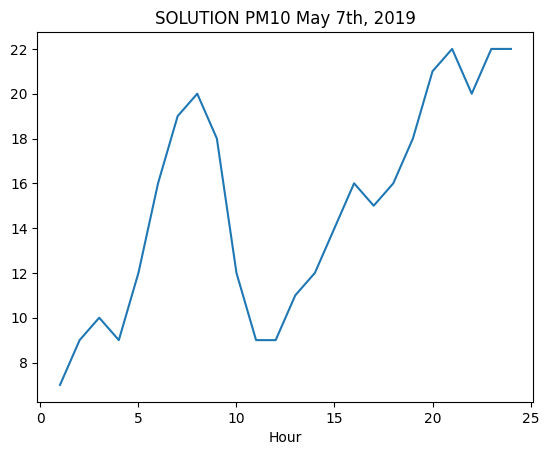

In [76]:
# SOLUTION

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

filtered = aria[(aria.Stazione == 'Parco S. Chiara') & (aria.Inquinante == 'PM10') & (aria.Data == '2019-05-07')]

plt.plot(filtered['Ora'], filtered['Valore'] )
plt.title('SOLUTION PM10 May 7th, 2019')
plt.xlabel('Hour')
plt.show()

### 7.2 Exercise - Game of Thrones

Open with Pandas the file [game-of-thrones.csv](game-of-thrones.csv) which holds episodes from various years.

- use  `UTF-8` encoding
- **IMPORTANT**: place the dataframe into the variable `game`, so not to confuse it with previous dataframes

Data source:  [Kaggle](https://www.kaggle.com/datasets/bakar31/game-of-thronesgot) - License: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)

#### 7.2.1 Exercise - fan

You are given a dictionary `favorite` with the most liked episodes of a group of people, who unfortunately don't remember exactly the various titles which are often incomplete: Select the favorite episodes of Paolo and Chiara.

- assume the capitalization in `favorite` is the correct one
- **NOTE**: the dataset contains insidious double quotes around the titles, but if you write the code in the right way it shouldn't be a problem

In [77]:

import pandas as pd
import numpy as np    

favorite = {
    "Paolo" : 'Winter Is',
    "Chiara" : 'Wolf and the Lion',
    "Anselmo" : 'Fire and',
    "Letizia" : 'Garden of'
}


# write here
game = pd.read_csv('game-of-thrones.csv', encoding='UTF-8')

titolidf = game[  (game["Title"].str.contains(favorite['Paolo'])) | (game["Title"].str.contains(favorite['Chiara']))] 

titolidf

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1


#### 7.2.2  Esercise - first airing

Select all the episodes which have been aired the first time in a given `year` (`Original air date` column)

- **NOTE**: `year` is given as an `int`

In [78]:
year = 17

# write here
annidf = game[ game['Original air date'].str[-2:] == str(year)  ]
annidf

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
61,62,2,7,"""Stormborn""",Mark Mylod,Bryan Cogman,Outline from A Dream of Spring and original co...,23-Jul-17,9.27,8.9
62,63,3,7,"""The Queen's Justice""",Mark Mylod,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,30-Jul-17,9.25,9.2
63,64,4,7,"""The Spoils of War""",Matt Shakman,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,6-Aug-17,10.17,9.8
64,65,5,7,"""Eastwatch""",Matt Shakman,Dave Hill,Outline from A Dream of Spring and original co...,13-Aug-17,10.72,8.8
65,66,6,7,"""Beyond the Wall""",Alan Taylor,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,20-Aug-17,10.24,9.0
66,67,7,7,"""The Dragon and the Wolf""",Jeremy Podeswa,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,27-Aug-17,12.07,9.4


### 7.3 Exercise -  Healthcare facilities 

✪✪ Let's examine the dataset [SANSTRUT001.csv](SANSTRUT001.csv) which contains the healthcare facilities of Trentino region, and for each tells the type of assistance it offers (clinical activity, diagnostics, etc), the code and name of the communality where it is located.


Data source: [dati.trentino.it](https://dati.trentino.it/dataset/strutture-sanitarie-dell-azienda-sanitaria-e-convenzionate) Licenza: [Creative Commons Attribution 4.0](http://creativecommons.org/licenses/by/4.0/deed.it)

Write a function which takes as input a town code and a text string, opens the file **with pandas** (encoding UTF-8) and:

1. PRINTS also the number of found rows
2. RETURNS a dataframe with selected only the rows having that town code and which contain the string in the column `ASSISTENZA`. The returned dataset must have only the columns 
`STRUTTURA`, `ASSISTENZA`, `COD_COMUNE`, `COMUNE`. 

In [79]:
import pandas as pd   
import numpy as np    

def strutsan(cod_comune, assistenza):
    #jupman-raise
    print('***** SOLUTION')    
    strudf = pd.read_csv('SANSTRUT001.csv', encoding='UTF-8')    
    res = strudf[((strudf['COD_COMUNE'] == cod_comune) & strudf['ASSISTENZA'].str.contains(assistenza))]    
    
    print("Found", res.shape[0], "facilities")
    return res[ ['STRUTTURA', 'ASSISTENZA', 'COD_COMUNE', 'COMUNE']  ]
    #/jupman-raise


In [80]:
strutsan(22050, '')  # no ASSISTENZA filter

***** SOLUTION
Found 6 facilities


,STRUTTURA,ASSISTENZA,COD_COMUNE,COMUNE
0,PRESIDIO OSPEDALIERO DI CAVALESE,ATTIVITA` CLINICA,22050,CAVALESE
1,PRESIDIO OSPEDALIERO DI CAVALESE,DIAGNOSTICA STRUMENTALE E PER IMMAGINI,22050,CAVALESE
2,PRESIDIO OSPEDALIERO DI CAVALESE,ATTIVITA` DI LABORATORIO,22050,CAVALESE
3,CENTRO SALUTE MENTALE CAVALESE,ASSISTENZA PSICHIATRICA,22050,CAVALESE
4,CENTRO DIALISI CAVALESE,ATTIVITA` CLINICA,22050,CAVALESE
5,CONSULTORIO CAVALESE,ATTIVITA` DI CONSULTORIO MATERNO-INFANTILE,22050,CAVALESE


In [81]:
strutsan(22205, 'CLINICA')

***** SOLUTION
Found 16 facilities


,STRUTTURA,ASSISTENZA,COD_COMUNE,COMUNE
59,PRESIDIO OSPEDALIERO S.CHIARA,ATTIVITA` CLINICA,22205,TRENTO
62,CENTRO DIALISI TRENTO,ATTIVITA` CLINICA,22205,TRENTO
63,POLIAMBULATORI S.CHIARA,ATTIVITA` CLINICA,22205,TRENTO
64,PRESIDIO OSPEDALIERO VILLA IGEA,ATTIVITA` CLINICA,22205,TRENTO
73,OSPEDALE CLASSIFICATO S.CAMILLO,ATTIVITA` CLINICA,22205,TRENTO
84,NEUROPSICHIATRIA INFANTILE - UONPI 1,ATTIVITA` CLINICA,22205,TRENTO
87,CASA DI CURA VILLA BIANCA SPA,ATTIVITA` CLINICA,22205,TRENTO
90,CENTRO SERVIZI SANITARI,ATTIVITA` CLINICA,22205,TRENTO
93,PSICOLOGIA CLINICA,ATTIVITA` CLINICA,22205,TRENTO
122,"ASSOCIAZIONE TRENTINA SCLEROSI MULTIPLA, ONLUS",ATTIVITA` CLINICA,22205,TRENTO


In [82]:
strutsan(22205, 'LABORATORIO')

***** SOLUTION
Found 5 facilities


,STRUTTURA,ASSISTENZA,COD_COMUNE,COMUNE
61,PRESIDIO OSPEDALIERO S.CHIARA,ATTIVITA` DI LABORATORIO,22205,TRENTO
85,LABORATORI ADIGE SRL,ATTIVITA` DI LABORATORIO,22205,TRENTO
86,LABORATORIO DRUSO SRL,ATTIVITA` DI LABORATORIO,22205,TRENTO
89,CASA DI CURA VILLA BIANCA SPA,ATTIVITA` DI LABORATORIO,22205,TRENTO
92,CENTRO SERVIZI SANITARI,ATTIVITA` DI LABORATORIO,22205,TRENTO


## Continue

Go on with [advanced operations](https://en.softpython.org/pandas/pandas2-advanced-sol.html) worksheet